In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [24]:
a=([-5.957, -4.09 , -2.373, -0.805,  0.614,  1.884,  3.004,  3.866, \
    4.798,  5.731,  6.663,  7.595,  8.527,  9.46 , 10.392, 11.324, \
    12.257, 13.189, 14.121])

In [25]:
b = [0.03923271, 0.04603236, 0.0545532 , 0.06536876, 0.07927697,
       0.09737748, 0.12112036, 0.14801332, 0.19183958, 0.26152085,
       0.36641291, 0.49172605, 0.61875352, 0.73630883, 0.82435439,
       0.87406962, 0.90070691, 0.916753  , 0.92481898]

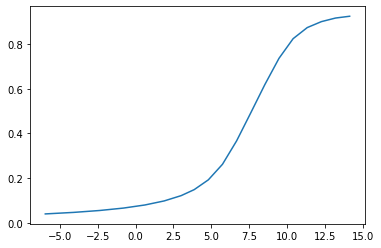

In [26]:
plt.plot(a,b)

In [11]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [14]:
popt, pcov = curve_fit(func, x, y, maxfev=1000)
popt

array([-4.85513922e+03,  1.13464916e-05,  4.85525704e+03])

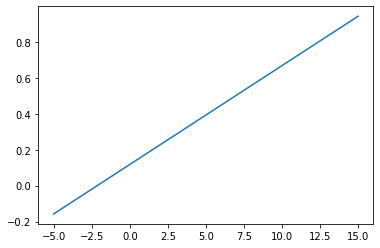

In [33]:
plt.plot(x, func(x, *popt), label="Fitted Curve")

In [30]:
x=np.linspace(-5,15,21)
x

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,
        8.,  9., 10., 11., 12., 13., 14., 15.])

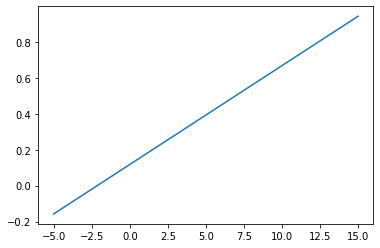

In [31]:
y= -4.85513922e+03*np.exp(-1.13464916e-05 * x) + 4.85525704e+03
plt.plot(x,y,label="Fitted Curve")
#plt.plot(a,b)

In [ ]:
x
y = func(xdata, 2.5, 1.3, 0.5)